In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Auto sales data.csv')  # Replace with your file name
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [2]:
data = pd.read_csv('Auto sales data.csv')  # Ensure the file is in the current directory


In [3]:
import os
print(os.getcwd())


c:\Portfolio Project.py


In [4]:
# Basic dataset info
data.info()

# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [7]:
# Check for any leading/trailing spaces or inconsistencies in column names
data.columns = data.columns.str.strip()  # Strip any leading/trailing spaces
print(data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [8]:
# Summary statistics for numerical columns
numerical_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
print(data[numerical_columns].describe())


       QUANTITYORDERED    PRICEEACH         SALES         MSRP
count      2747.000000  2747.000000   2747.000000  2747.000000
mean         35.103021   101.098952   3553.047583   100.691664
std           9.762135    42.042549   1838.953901    40.114802
min           6.000000    26.880000    482.130000    33.000000
25%          27.000000    68.745000   2204.350000    68.000000
50%          35.000000    95.550000   3184.800000    99.000000
75%          43.000000   127.100000   4503.095000   124.000000
max          97.000000   252.870000  14082.800000   214.000000


In [9]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Drop rows where 'SALES' is missing or fill missing values for others
data = data.dropna(subset=['SALES'])  # Remove rows where 'SALES' is NaN


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


In [10]:
# Count the occurrences of each unique value in the categorical columns
print(data['STATUS'].value_counts())
print(data['PRODUCTLINE'].value_counts())
print(data['COUNTRY'].value_counts())


STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64
PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64
COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: count, dtype: int64


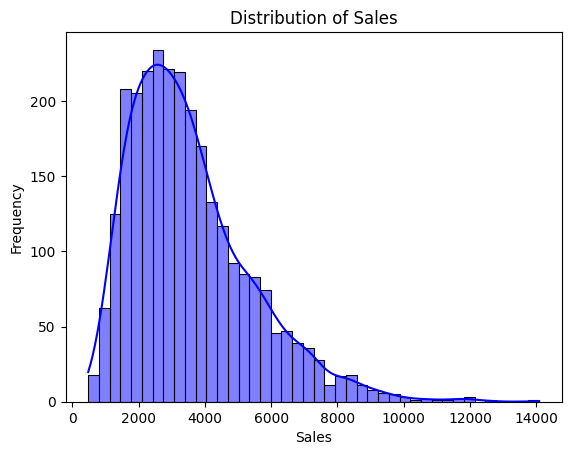

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of sales
sns.histplot(data['SALES'], kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


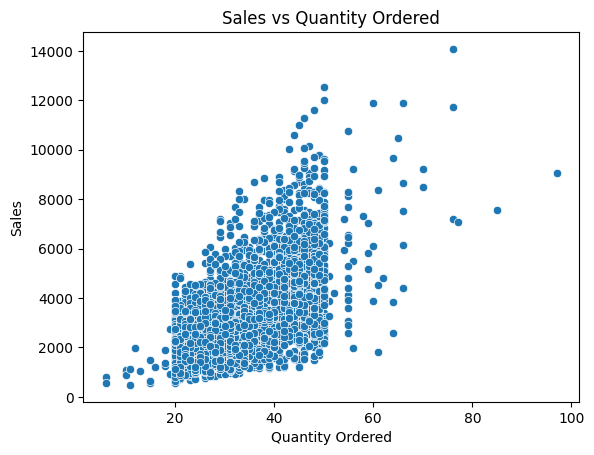

In [12]:
# Scatter plot to see the relationship between quantity ordered and sales
sns.scatterplot(x=data['QUANTITYORDERED'], y=data['SALES'])
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()


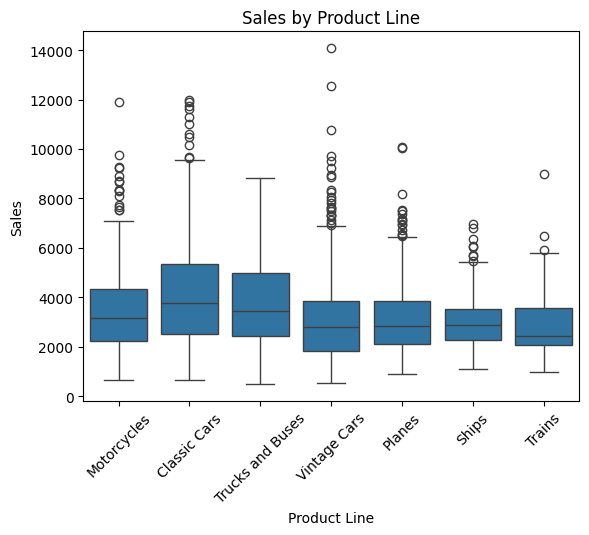

In [13]:
# Box plot to compare sales across different product lines
sns.boxplot(x=data['PRODUCTLINE'], y=data['SALES'])
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


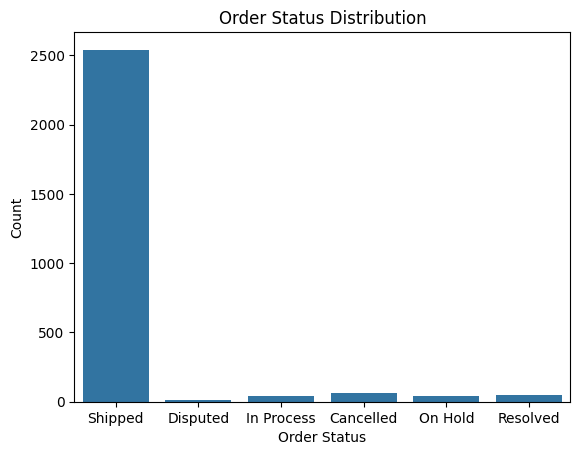

In [14]:
# Count plot for orders by status (e.g., 'Shipped', 'Pending')
sns.countplot(x='STATUS', data=data)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


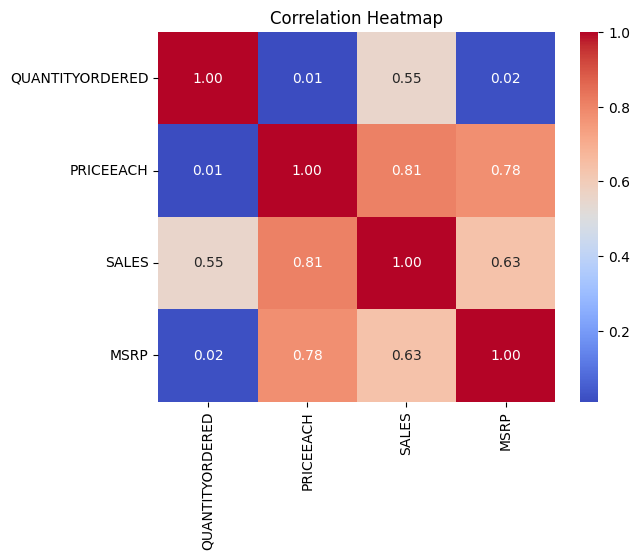

In [15]:
# Correlation matrix for numerical columns
correlation = data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].corr()

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_81192\2275993254.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


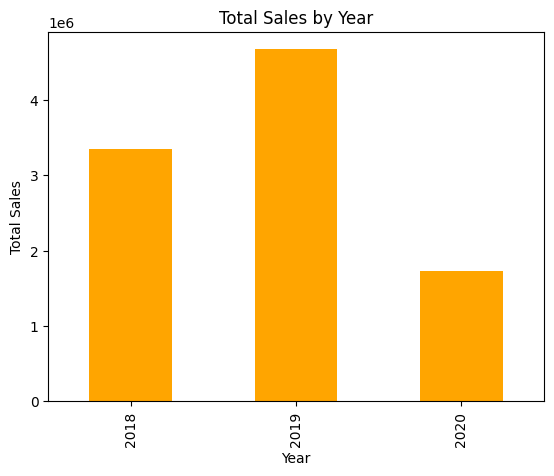

In [16]:
# Convert ORDERDATE to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Extract Year and Month for time-based analysis
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month

# Plot total sales per year
sales_by_year = data.groupby('Year')['SALES'].sum()
sales_by_year.plot(kind='bar', color='orange')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()
